# Instructions - MNIST Hand Written Digit Classification 
* You are given the MNIST dataset below, select two digits from the data, e.g. 0 and 5, and 
* use any two machine learning models to classify the two different images. 
* Please specify how you train your models, how you obtain your model parameters, and how you evaluate your model.
* (Bonus Question) Use any one method to classify any three digits (e.g. 0 vs 1 vs 2)
* (Bonus Question) Can you write down a digit on a paper, take a picture, and let your model tell which digit is it?
* (Bayesian bonus) Give Bayesian intpretation of your model.

In [1]:
from __future__ import absolute_import, print_function
import bayes_logistic
import bayes_logistic as bl
from scipy.optimize import minimize
from scipy.stats import norm
import copy

In [2]:
import numpy as np
from sklearn.datasets import fetch_mldata

In [3]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

print(X.shape) 
print(y.shape)

D:\Users\chandu-user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
D:\Users\chandu-user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


(70000, 784)
(70000,)


In [4]:
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [5]:
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

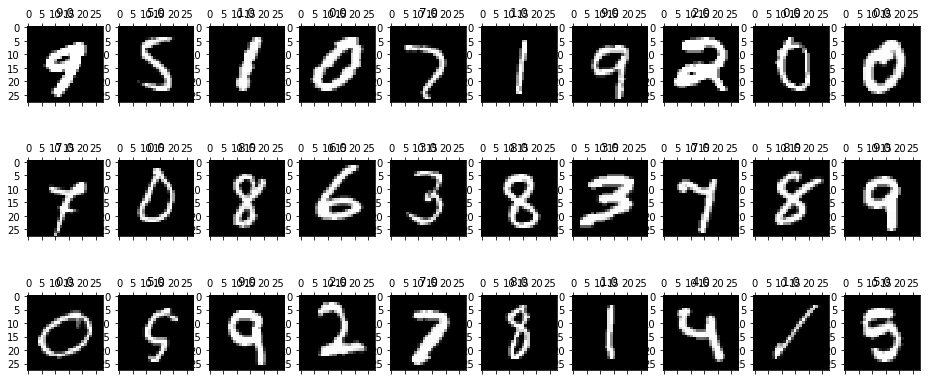

In [6]:

import matplotlib.pyplot as plt
%matplotlib inline
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title=str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

# References Used

https://www.quora.com/How-do-I-convert-an-image-into-2D-array-using-structures-in-Python

https://towardsdatascience.com/support-vector-machine-mnist-digit-classification-with-python-including-my-hand-written-digits-83d6eca7004a

https://bayes-logistic.readthedocs.io/en/latest/_modules/bayes_logistic/bayes_logistic.html

# Question

Two digits selected:  2 and 5

Classifiers Used:     Logistic Regression, Support Vector Machine

In [53]:
df_2_5 = df.loc[(df["label"]=="2.0") | (df["label"]=="5.0")]

In [54]:
df_2_5.label.value_counts()

2.0    6990
5.0    6313
Name: label, dtype: int64

In [55]:
y=df_2_5.values[:,784]
X=df_2_5.loc[:,df_2_5.columns != "label"]

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train_image, X_test_image, y_train_image, y_test_image = train_test_split(X,y,test_size=0.25, random_state=328393)

In [58]:
from sklearn.decomposition import PCA

In [59]:
X_pca = PCA(n_components=2)

In [60]:
X_pca.fit(X)
X_PCA = X_pca.transform(X)
X_PCA.shape

(13303, 2)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA,y,test_size=0.25, random_state=328393)

### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logmodel_2_5 = LogisticRegression()
logmodel_2_5.fit(X_train,y_train)

D:\Users\chandu-user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
predictions = logmodel_2_5.predict(X_test)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
print(confusion_matrix(y_test,predictions))

[[1663   89]
 [  87 1487]]


In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         2.0       0.95      0.95      0.95      1752
         5.0       0.94      0.94      0.94      1574

   micro avg       0.95      0.95      0.95      3326
   macro avg       0.95      0.95      0.95      3326
weighted avg       0.95      0.95      0.95      3326



Validating the model by randoming printing 6 images and predicting its label

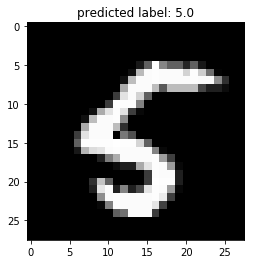

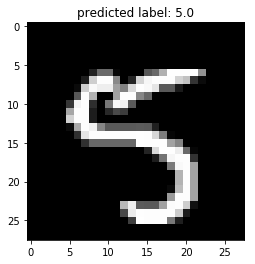

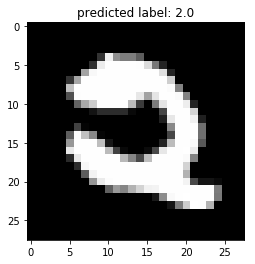

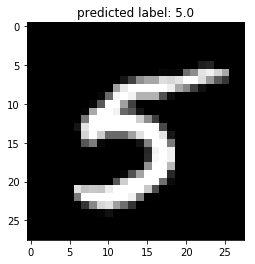

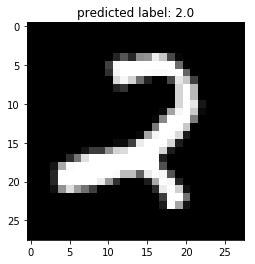

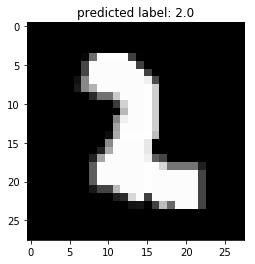

In [68]:
for i in (np.random.randint(0,3326,6)):
 two_d = (np.reshape(X_test_image.values[i], (28, 28)) * 255).astype(np.uint8)
 plt.title('predicted label: {0}'. format(predictions[i]))
 plt.imshow(two_d, interpolation='nearest', cmap='gray')
 plt.show()

### Support Vector Machine

In [69]:
from sklearn.svm import SVC

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
SVMmodel= SVC()

In [72]:
SVMmodel.fit(X_train,y_train)

D:\Users\chandu-user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [73]:
predictions_SVM = SVMmodel.predict(X_test)

In [74]:
print(confusion_matrix(y_test,predictions_SVM))

[[1695   57]
 [  62 1512]]


In [75]:
print(classification_report(y_test,predictions_SVM))

              precision    recall  f1-score   support

         2.0       0.96      0.97      0.97      1752
         5.0       0.96      0.96      0.96      1574

   micro avg       0.96      0.96      0.96      3326
   macro avg       0.96      0.96      0.96      3326
weighted avg       0.96      0.96      0.96      3326



To further improve SVM, I have used Grid Search CV.

In [76]:
parameters = {'C':[0.001, 0.1, 1, 10, 100], 'gamma':[10,1,0.1,0.01]}
grid = GridSearchCV(SVC(),param_grid=parameters, cv=5)

In [77]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
print(grid.score(X_test, y_test))
#96.39% accuracy of SVM tests

0.9639206253758268


In [79]:
y_pred = grid.predict(X_test)

In [81]:
print(confusion_matrix(y_test, y_pred))

[[1694   58]
 [  62 1512]]


In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         2.0       0.96      0.97      0.97      1752
         5.0       0.96      0.96      0.96      1574

   micro avg       0.96      0.96      0.96      3326
   macro avg       0.96      0.96      0.96      3326
weighted avg       0.96      0.96      0.96      3326



Validation (By printing 6 random Images from the test dataset and predicting the label using SVM model)

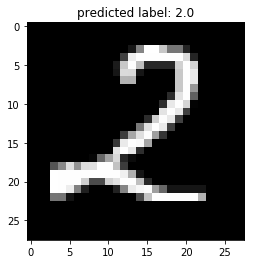

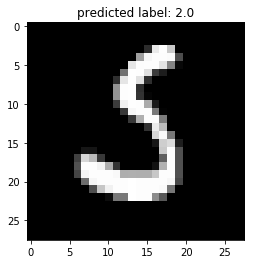

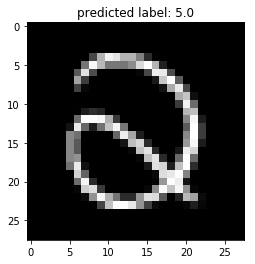

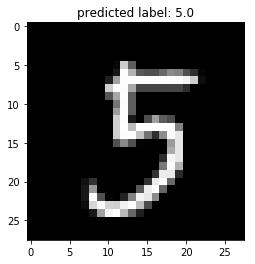

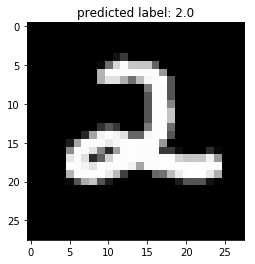

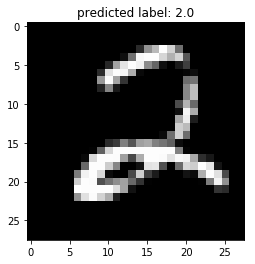

In [82]:
for i in (np.random.randint(0,3326,6)):
 two_d = (np.reshape(X_test_image.values[i], (28, 28)) * 255).astype(np.uint8)
 plt.title('predicted label: {0}'. format(y_pred[i]))
 plt.imshow(two_d, interpolation='nearest', cmap='gray')
 plt.show()

### Please specify how you train your models, how you obtain your model parameters, and how you evaluate your model.

As per the instructions provided, I created a dataframe in which I kept records which belonged to any 2 lables (in my case 2 and 5). Then, I reduced the number of model parameters using PCA and then I used that reduced features as X for my train-test split in which I kept 25% of my data for test set. Using X_train and y_train, I trained my model. Then i used that model on my test data to evaluate it. 

I obtained the model paramters using PCA. As the model has 784 features, I reduced the dimensions using PCA. I have used PCA 2 components.

To evaluate my model, I have used confusion matrix and classification report, along with accuracy score. In classification report, I have focused on the F1 score. Additionally, I have evaluted the model by randomly printing some images and printing what the model will predict.

## Bonus 1: Use any one method to classify any three digits

For this part, I have used Support Vector Machine

In [194]:
df_4_7_9 = df.loc[(df["label"]=="4.0") | (df["label"]=="7.0") | (df["label"]=="9.0")]

In [195]:
df_4_7_9.label.value_counts()

7.0    7293
9.0    6958
4.0    6824
Name: label, dtype: int64

In [196]:
y_1=df_4_7_9.values[:,784]
X_1=df_4_7_9.loc[:,df_4_7_9.columns != "label"]

In [197]:
X_train_image_bonus, X_test_image_bonus, y_train_image_bonus, y_test_image_bonus = train_test_split(X_1,y_1,test_size=0.25, random_state=529302)

In [198]:
X_pca_bonus = PCA(n_components=2)

In [199]:
X_pca_bonus.fit(X_1)
X_PCA_bonus = X_pca_bonus.transform(X_1)
X_PCA_bonus.shape

(21075, 2)

In [200]:
X_train_bonus, X_test_bonus, y_train_bonus, y_test_bonus = train_test_split(X_PCA_bonus,y_1,test_size=0.25, random_state=529302)

In [201]:
model_1=SVC()

In [202]:
parameters = {'C':[0.001, 0.1, 1, 10, 100], 'gamma':[10,1,0.1,0.01]}

In [203]:
grid_bonus = GridSearchCV(estimator=model_1,param_grid=parameters, cv=5)

In [204]:
grid_bonus.fit(X_train_bonus,y_train_bonus)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [205]:
print(grid_bonus.score(X_test_bonus, y_test_bonus))
#63.65 accuracy of SVM tests

0.6365534256974757


In [206]:
y_pred_bonus = grid_bonus.predict(X_test_bonus)

In [207]:
print(confusion_matrix(y_test_bonus, y_pred_bonus))

[[1315  100  350]
 [  98 1379  292]
 [ 464  611  660]]


In [208]:
print(classification_report(y_test_bonus, y_pred_bonus))

              precision    recall  f1-score   support

         4.0       0.70      0.75      0.72      1765
         7.0       0.66      0.78      0.71      1769
         9.0       0.51      0.38      0.43      1735

   micro avg       0.64      0.64      0.64      5269
   macro avg       0.62      0.63      0.62      5269
weighted avg       0.62      0.64      0.62      5269



Validating the model by randoming printing 6 images and predicting its label

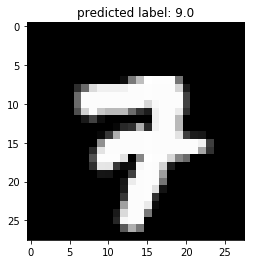

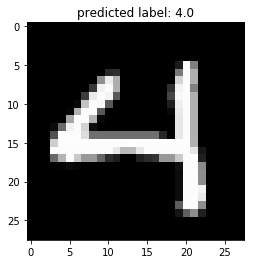

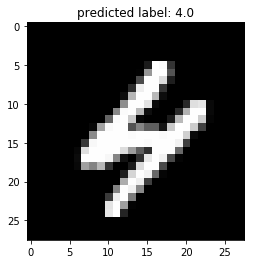

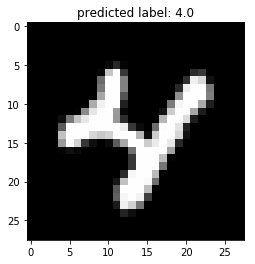

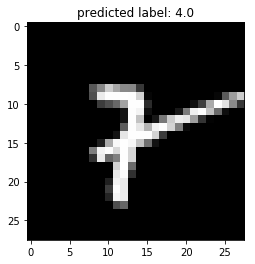

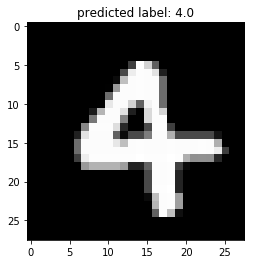

In [209]:
for i in (np.random.randint(0,5269,6)):
 two_d = (np.reshape(X_test_image_bonus.values[i], (28, 28)) * 255).astype(np.uint8)
 plt.title('predicted label: {0}'. format(y_pred_bonus[i]))
 plt.imshow(two_d, interpolation='nearest', cmap='gray')
 plt.show()

## Bonus 2: Can you write down a digit on a paper, take a picture, and let your model tell which digit is it? 

For this part, I have used the following models:

1) Logistic Regression   (on Images of Labels 2 and 5)


2) Support Vetor Machine  (on Images of Labels 7 and 9)

In [32]:
from PIL import Image
from numpy import*
from PIL import Image
import skimage.io as io

#### Logistic Regression (on photos of Labels 2,5)

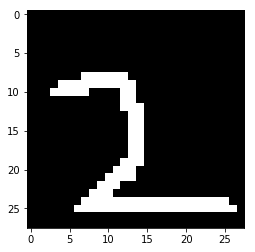

In [191]:
#Image of 2
img_2=cv2.imread("D.png")
im_2=cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)
im_2=cv2.GaussianBlur(im_2, (1,1),0)
plt.imshow(im_2)

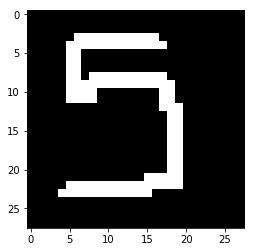

In [193]:
#Image of 5
img_5=cv2.imread("E.png")
im_5=cv2.cvtColor(img_5,cv2.COLOR_BGR2GRAY)
im_5=cv2.GaussianBlur(im_5, (1,1),0)
plt.imshow(im_5)

In [179]:
Image_5= (im_5/255).reshape(784)
Image_2= (im_2/255).reshape(784)

In [180]:
Image_5=pd.DataFrame(Image_5.reshape(1,784))
Image_2=pd.DataFrame(Image_2.reshape(1,784))

In [181]:
New_data_1= pd.concat([Image_2,Image_5])

In [182]:
pca_bonus_1 = PCA(n_components=2)

In [183]:
pca_bonus_1.fit(New_data_1)
PCA_bonus_1 = pca_bonus_1.transform(New_data_1)
PCA_bonus_1.shape

(2, 2)

In [184]:
predictions_1 = logmodel_2_5.predict(PCA_bonus_1)

In [185]:
predictions_1

array(['2.0', '5.0'], dtype=object)

Results:

Logistic Regression Model correctly classfied image of 2 as 2 and 5 as 5. This means that our model is working correctly.

#### SVM (on photos of Labels 7,9)  

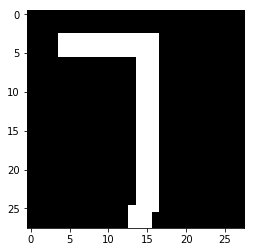

In [408]:
#Image of 7
img_7_a=cv2.imread("H.png")
im_7_a=cv2.cvtColor(img_7_a,cv2.COLOR_BGR2GRAY)
im_7_a=cv2.GaussianBlur(im_7_a, (1,1),0)
plt.imshow(im_7_a)

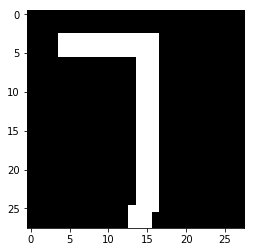

In [364]:
#Another Image of 7
img_7=cv2.imread("H.png")
im_7=cv2.cvtColor(img_7,cv2.COLOR_BGR2GRAY)
im_7=cv2.GaussianBlur(im_7, (1,1),0)
plt.imshow(im_7)

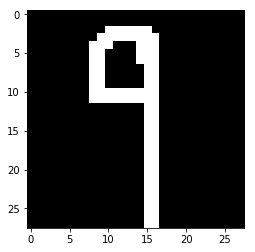

In [365]:
#Image of 9
img_9=cv2.imread("C.png")
im_9=cv2.cvtColor(img_9,cv2.COLOR_BGR2GRAY)
im_9=cv2.GaussianBlur(im_9, (1,1),0)
plt.imshow(im_9)

In [412]:
Image_7= (im_7/255).reshape(784)
Image_9= (im_9/255).reshape(784)
Image_7_a = (im_7_a/255).reshape(784)

In [413]:
Image_7=pd.DataFrame(Image_7.reshape(1,784))
Image_7_a=pd.DataFrame(Image_7_a.reshape(1,784))
Image_9=pd.DataFrame(Image_9.reshape(1,784))

In [414]:
New_data= pd.concat([Image_7_a,Image_7,Image_9])

In [415]:
pca_bonus = PCA(n_components=2)

In [416]:
pca_bonus.fit(New_data)
PCA_bonus = pca_bonus.transform(New_data)
PCA_bonus.shape

(3, 2)

In [417]:
predictions = grid_bonus.predict(PCA_bonus)

In [418]:
predictions

array(['7.0', '7.0', '9.0'], dtype=object)

Results:

SVM correctly classfied image of both 7s as 7 and imgae of 9 as 9. This shows that our model is working fine.

## (Bayesian bonus) If you are able to give Bayesian intpretation of your model, a total of 20 bonus points. 

### Bayesian Logistic Regression 

In [419]:
df_2_5_Bayesian = df.loc[(df["label"]=="2.0") | (df["label"]=="5.0")]

In [420]:
df_2_5_Bayesian["label"]=pd.to_numeric(df_2_5_Bayesian['label'])

D:\Users\chandu-user\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [421]:
y=df_2_5_Bayesian.values[:,784]
X=df_2_5_Bayesian.loc[:,df_2_5_Bayesian.columns != "label"]

In [422]:
def LabelConversion(cols):
    if cols == 5.0:
        return 1.0    
    else:
        return 0.0
    
y = df_2_5_Bayesian["label"].apply(LabelConversion)

In [423]:
X_pca_Bayesian = PCA(n_components=2)

In [424]:
X_pca_Bayesian.fit(X)
X_PCA_Bayesian = X_pca_Bayesian.transform(X)
X_PCA_Bayesian.shape

(13303, 2)

In [428]:
import copy

In [425]:
def logistic_prob(X, w):
    """ MAP (Bayes point) logistic regression probability with overflow prevention via exponent truncation
    Parameters
    ----------
    X : array-like, shape (N, p)
        Feature matrix
    w : array-like, shape (p, )
        Parameter vector
    Returns
    -------
    pr : array-like, shape (N, )
        vector of logistic regression probabilities
    References
    ----------
    Chapter 8 of Murphy, K. 'Machine Learning a Probabilistic Perspective', MIT Press (2012)
    Chapter 4 of Bishop, C. 'Pattern Recognition and Machine Learning', Springer (2006)
    """

    # set a truncation exponent.
    trunc = 8.  # exp(8)/(1+exp(8)) = 0.9997 which is close enough to 1 as to not matter in most cases.

    # calculate argument of logit
    z = np.dot(X, w)
    
    # truncate to avoid numerical over/underflow
    z = np.clip(z, -trunc, trunc)
    #print('z',z)
    # calculate logitstic probability
    pr = np.exp(z)
    pr = pr / (1. + pr)
    #print('pr',pr)
    return pr


def f_log_posterior(w, wprior, H, y, X, weights=None):
    """Returns negative log posterior probability.
    Parameters
    ----------
    w : array-like, shape (p, )
        vector of parameters at which the negative log posterior is to be evaluated
    wprior : array-like, shape (p, )
        vector of prior means on the parameters to be fit
    H : array-like, shape (p, p) or (p, )
        Array of prior Hessian (inverse covariance of prior distribution of parameters)
    y : array-like, shape (N, )
        vector of binary ({0,1} responses)
    X : array-like, shape (N, p)
        array of features
    weights : array-like, shape (N, )
        vector of data point weights. Should be within [0,1]
    Returns
    -------
    neg_log_post : float
                negative log posterior probability
    References
    ----------
    Chapter 8 of Murphy, K. 'Machine Learning a Probabilistic Perspective', MIT Press (2012)
    Chapter 4 of Bishop, C. 'Pattern Recognition and Machine Learning', Springer (2006)
    """

    # fill in weights if need be
    if weights is None:
        weights = np.ones(len(np.atleast_1d(y)), )
    if len(np.atleast_1d(weights)) != len(np.atleast_1d(y)):
        raise ValueError(' weight vector must be same length as response vector')

    # calculate negative log posterior

    eps = 1e-6  # this defined to ensure that we never take a log of zero

    mu = logistic_prob(X, w)

    if len(H.shape) == 2:
        neg_log_post = (- (np.dot(y.T, weights * np.log(mu + eps))
                           + np.dot((1. - y).T, weights * np.log(1. - mu + eps)))
                        + 0.5 * np.dot((w - wprior).T, np.dot(H, (w - wprior))))
    elif len(H.shape) == 1:
        neg_log_post = (- (np.dot(y.T, weights * np.log(mu + eps))
                           + np.dot((1. - y).T, weights * np.log(1. - mu + eps)))
                        + 0.5 * np.dot((w - wprior).T, H * (w - wprior)))
    else:
        raise ValueError('Incompatible Hessian')
    print('neg_log_post',neg_log_post)
    return float(neg_log_post)


def g_log_posterior(w, wprior, H, y, X, weights=None):
    """Returns gradient of the negative log posterior probability.
    Parameters
    ----------
    w : array-like, shape (p, )
        parameter vector at which the gradient is to be evaluated
    wprior : array-like, shape (p, )
        array of prior means on the parameters to be fit
    H : array-like, shape (p, p) or (p, )
        array of prior Hessian (inverse covariance of prior distribution of parameters)
    y : array-like, shape (N, )
        array of binary ({0,1} responses)
    X : array-like, shape (N, p)
        array of features
    weights : array-like, shape (N, )
        array of data point weights. Should be within [0,1]
    Returns
    -------
    grad_log_post : array-like, shape (p, )
                gradient of negative log posterior
    References
    ----------
    Chapter 8 of Murphy, K. 'Machine Learning a Probabilistic Perspective', MIT Press (2012)
    Chapter 4 of Bishop, C. 'Pattern Recognition and Machine Learning', Springer (2006)
    """

    # fill in weights if need be
    if weights is None:
        weights = np.ones(len(np.atleast_1d(y)), )
    if len(np.atleast_1d(weights)) != len(np.atleast_1d(y)):
        raise ValueError(' weight vector must be same length as response vector')

    # calculate gradient

    mu_ = logistic_prob(X, w)

    if len(H.shape) == 2:
        grad_log_post = np.dot(X.T, weights * (mu_ - y)) + np.dot(H, (w - wprior))
    elif len(H.shape) == 1:
        grad_log_post = np.dot(X.T, weights * (mu_ - y)) + H * (w - wprior)
    else:
        raise ValueError('Incompatible Hessian')
    print('grad_log_post',grad_log_post)
    return grad_log_post


def g_log_posterior_small(w, wprior, H, y, X, weights=None):
    """Returns normalized (to 1) gradient of the negative log posterior probability.
    This is used for BFGS and L-BFGS-B solvers which tend to not converge unless
    the gradient is normalized.
    Parameters
    ----------
    w : array-like, shape (p, )
        parameter vector at which the gradient is to be evaluated
    wprior : array-like, shape (p, )
        array of prior means on the parameters to be fit
    H : array-like, shape (p, p) or (p, )
        array of prior Hessian (inverse covariance of prior distribution of parameters)
    y : array-like, shape (N, )
        array of binary ({0,1} responses)
    X : array-like, shape (N, p)
        array of features
    weights : array-like, shape (N, )
        array of data point weights. Should be within [0,1]
    Returns
    -------
    grad_log_post : array-like, shape (p, )
                normalized (to 1) gradient of negative log posterior
    References
    ----------
    Chapter 8 of Murphy, K. 'Machine Learning a Probabilistic Perspective', MIT Press (2012)
    Chapter 4 of Bishop, C. 'Pattern Recognition and Machine Learning', Springer (2006)
    """

    # fill in weights if need be
    if weights is None:
        weights = np.ones(len(np.atleast_1d(y)), )
    if len(np.atleast_1d(weights)) != len(np.atleast_1d(y)):
        raise ValueError(' weight vector must be same length as response vector')

    # calculate gradient

    mu = logistic_prob(X, w)

    if len(H.shape) == 2:
        grad_log_post = np.dot(X.T, weights * (mu - y)) + np.dot(H, (w - wprior))
    elif len(H.shape) == 1:
        grad_log_post = np.dot(X.T, weights * (mu - y)) + H * (w - wprior)
    else:
        raise ValueError('Incompatible Hessian')

    # normalize gradient to length 1
    grad_log_post = grad_log_post / np.sqrt(np.sum(grad_log_post * grad_log_post))

    return grad_log_post


def H_log_posterior(w, wprior, H, y, X, weights=None):
    """Returns Hessian (either full or diagonal) of the negative log posterior probability.
    Parameters
    ----------
    w : array-like, shape (p, )
        parameter vector at which the Hessian is to be evaluated
    wprior : array-like, shape (p, )
        array of prior means on the parameters to be fit
    H : array-like, shape (p, p) or (p, )
        array of log prior Hessian (inverse covariance of prior distribution of parameters)
    y : array-like, shape (N, )
        array of binary ({0,1} responses)
    X : array-like, shape (N, p)
        array of features
    weights : array-like, shape (N, )
        array of data point weights. Should be within [0,1]
    Returns
    -------
    H_log_post : array-like, shape like `H`
                Hessian of negative log posterior
    References
    ----------
    Chapter 8 of Murphy, K. 'Machine Learning a Probabilistic Perspective', MIT Press (2012)
    Chapter 4 of Bishop, C. 'Pattern Recognition and Machine Learning', Springer (2006)
    """

    # fill in weights if need be
    if weights is None:
        weights = np.ones(len(np.atleast_1d(y)), )
    if len(np.atleast_1d(weights)) != len(np.atleast_1d(y)):
        raise ValueError(' weight vector must be same length as response vector')

    # calculate log posterior Hessian

    mu = logistic_prob(X, w)

    S = mu * (1. - mu) * weights

    if len(H.shape) == 2:
        H_log_post = np.dot(X.T, X * S[:, np.newaxis]) + H
    elif len(H.shape) == 1:
        H_log_post = np.diag(np.dot(X.T, X * S[:, np.newaxis])) + H
    else:
        raise ValueError('Incompatible Hessian')

    return H_log_post


def HP_log_posterior(w, q, wprior, H, y, X, weights=None):
    """Returns diagonal Hessian of the negative log posterior probability multiplied by an arbitrary vector.
    This is useful for the Newton-CG solver, particularly when we only want to store a diagonal Hessian.
    Parameters
    ----------
    w : array-like, shape (p, )
        parameter vector at which the Hessian is to be evaluated
    q : array-like, shape (p, )
        arbitrary vector to multiply Hessian by
    wprior : array-like, shape (p, )
        array of prior means on the parameters to be fit
    H : array-like, shape (p, )
        array of diagonal log prior Hessian (inverse covariance of prior distribution of parameters)
    y : array-like, shape (N, )
        array of binary ({0,1} responses)
    X : array-like, shape (N, p)
        array of features
    weights : array-like, shape (N, )
        array of data point weights. Should be within [0,1]
    Returns
    -------
    HP : array-like, shape (p, )
        Hessian of log posterior (diagonal approx) multiplied by arbitrary vector
    References
    ----------
    Chapter 8 of Murphy, K. 'Machine Learning a Probabilistic Perspective', MIT Press (2012)
    Chapter 4 of Bishop, C. 'Pattern Recognition and Machine Learning', Springer (2006)
    """

    # fill in weights if need be
    if weights is None:
        weights = np.ones(len(np.atleast_1d(y)), )
    if len(np.atleast_1d(weights)) != len(np.atleast_1d(y)):
        raise ValueError(' weight vector must be same length as response vector')

    HP = H_log_posterior(w, wprior, H, y, X, weights)
    HP = HP * q

    return HP


def fit_bayes_logistic(y, X, wprior, H, weights=None, solver='Newton-CG', bounds=None, maxiter=100):
    """ Bayesian Logistic Regression Solver.  Assumes Laplace (Gaussian) Approximation
    to the posterior of the fitted parameter vector. Uses scipy.optimize.minimize
    Parameters
    ----------
    y : array-like, shape (N, )
        array of binary {0,1} responses
    X : array-like, shape (N, p)
        array of features
    wprior : array-like, shape (p, )
        array of prior means on the parameters to be fit
    H : array-like, shape (p, p) or (p, )
        array of prior Hessian (inverse covariance of prior distribution of parameters)
    weights : array-like, shape (N, )
        array of data point weights. Should be within [0,1]
    solver : string
        scipy optimize solver used.  this should be either 'Newton-CG', 'BFGS' or 'L-BFGS-B'.
        The default is Newton-CG.
    bounds : iterable of length p
        a length p list (or tuple) of tuples each of length 2.
        This is only used if the solver is set to 'L-BFGS-B'. In that case, a tuple
        (lower_bound, upper_bound), both floats, is defined for each parameter.  See the
        scipy.optimize.minimize docs for further information.
    maxiter : int
        maximum number of iterations for scipy.optimize.minimize solver.
    Returns
    -------
    w_fit : array-like, shape (p, )
        posterior parameters (MAP estimate)
    H_fit : array-like, shape like `H`
        posterior Hessian  (Hessian of negative log posterior evaluated at MAP parameters)
    References
    ----------
    Chapter 8 of Murphy, K. 'Machine Learning a Probabilistic Perspective', MIT Press (2012)
    Chapter 4 of Bishop, C. 'Pattern Recognition and Machine Learning', Springer (2006)
    """

    # Check that dimensionality of inputs agrees

    # check X
    if len(X.shape) != 2:
        raise ValueError('X must be a N*p matrix')
    (nX, pX) = X.shape

    # check y
    if len(y.shape) > 1:
        raise ValueError('y must be a vector of shape (p, )')
    if len(np.atleast_1d(y)) != nX:
        raise ValueError('y and X do not have the same number of rows')

    # check wprior
    if len(wprior.shape) > 1:
        raise ValueError('prior should be a vector of shape (p, )')
    if len(np.atleast_1d(wprior)) != pX:
        raise ValueError('prior mean has incompatible length')

    # check H
    if len(H.shape) == 1:
        if np.atleast_1d(H).shape[0] != pX:
            raise ValueError('prior Hessian is diagonal but has incompatible length')
    elif len(H.shape) == 2:
        (h1,h2) = np.atleast_2d(H).shape
        if h1 != h2:
            raise ValueError('prior Hessian must either be a p*p square matrix or a vector or shape (p, ) ')
        if h1 != pX:
            raise ValueError('prior Hessian is square but has incompatible size')

    # fill in weights if need be
    if weights is None:
        weights = np.ones(len(np.atleast_1d(y)), )
    if len(np.atleast_1d(weights)) != len(np.atleast_1d(y)):
        raise ValueError(' weight vector must be same length as response vector')

    # Do the regression

    if solver == 'Newton-CG':

        if len(H.shape) == 2:

            ww = minimize(f_log_posterior, wprior, args=(wprior, H, y, X, weights), jac=g_log_posterior,
                          hess=H_log_posterior, method='Newton-CG', options={'maxiter': maxiter})
            w_fit = ww.x
            H_fit = H_log_posterior(w_fit, wprior, H, y, X, weights)

        elif len(H.shape) == 1:

            ww = minimize(f_log_posterior, wprior, args=(wprior, H, y, X, weights), jac=g_log_posterior,
                          hessp=HP_log_posterior, method='Newton-CG', options={'maxiter': maxiter})
            w_fit = ww.x
            H_fit = H_log_posterior(w_fit, wprior, H, y, X, weights)

        else:
            raise ValueError(' You must either use the full Hessian or its diagonal as a vector')

    elif solver == 'BFGS':
        ww = minimize(f_log_posterior, wprior, args=(wprior, H, y, X, weights), jac=g_log_posterior_small,
                      method='BFGS', options={'maxiter': maxiter})
        w_fit = ww.x
        H_fit = H_log_posterior(w_fit, wprior, H, y, X, weights)
       

    elif solver == 'L-BFGS-B':
        ww = minimize(f_log_posterior, wprior, args=(wprior, H, y, X, weights), jac=g_log_posterior_small,
                      method='L-BFGS-B', bounds=bounds, options={'maxiter': maxiter})
        w_fit = ww.x
        H_fit = H_log_posterior(w_fit, wprior, H, y, X, weights)

    else:
        raise ValueError('Unknown solver specified: "{0}"'.format(solver))
    
    print(ww)
    #print(ww.shape)
    return w_fit, H_fit



def bayes_logistic_prob(X, w, H):
    """ Posterior predictive logistic regression probability.  Uses probit approximation
        to the logistic regression sigmoid. Also has overflow prevention via exponent truncation.
    Parameters
    ----------
    X : array-like, shape (N, p)
        array of covariates
    w : array-like, shape (p, )
        array of fitted MAP parameters
    H : array-like, shape (p, p) or (p, )
        array of log posterior Hessian (covariance matrix of fitted MAP parameters)
    Returns
    -------
    pr : array-like, shape (N, )
        moderated (by full distribution) logistic probability
    References
    ----------
    Chapter 8 of Murphy, K. 'Machine Learning a Probabilistic Perspective', MIT Press (2012)
    Chapter 4 of Bishop, C. 'Pattern Recognition and Machine Learning', Springer (2006)
    """

    # set a truncation exponent
    trunc = 8.  # exp(8)/(1+exp(8)) = 0.9997 which is close enough to 1 as to not matter in most cases.

    # unmoderated argument of exponent
    z_a = np.dot(X, w)

    # find  the moderation
    if len(H.shape) == 2:
        H_inv_ = np.linalg.inv(H)
        sig2_a = np.sum(X * np.dot(H_inv_, X.T).T, axis=1)
    elif len(H.shape) == 1:
        H_inv_ = 1. / H
        sig2_a = np.sum(X * (H_inv_ * X), axis=1)
    else:
        raise ValueError(' You must either use the full Hessian or its diagonal as a vector')
    print('H inverse',H_inv_)
    print('sig2_a',sig2_a)
    # get the moderation factor. Implicit in here is approximating the logistic sigmoid with
    # a probit by setting the probit and sigmoid slopes to be equal at the origin. This is where
    # the factor of pi/8 comes from.
    kappa_sig2_a = 1. / np.sqrt(1. + 0.125 * np.pi * sig2_a)

    # calculate the moderated argument of the logit
    z = z_a * kappa_sig2_a
    # do a truncation to prevent exp overflow
    z = np.clip(z, -trunc, trunc)

    # get the moderated logistic probability
    pr = np.exp(z)
#    pr = pr / (1. + pr)

    return pr

In [429]:
n_samples, n_features = X_PCA_Bayesian.shape

# Add bias column to the feature matrix
B = np.ones((n_samples, n_features + 1)) 
B[:, 1:] = X_PCA_Bayesian
X_PCA_Bayesian = B

training_X, test_X, training_y, test_y = train_test_split(X_PCA_Bayesian,y, test_size=0.25,random_state=362874)

In [430]:
# Train the model 
w_prior = np.zeros(n_features + 1)
H_prior = np.diag(np.ones(n_features + 1))*0.001

GD_BATCH_SIZE = len(training_X)
ITERATION_CNT = 10
w = training_X.shape[1]
w_prior = np.zeros(w)
H_prior = np.diag(np.ones(w))*0.001

for i in range(0, ITERATION_CNT):
    for idx in range(0, len(training_X), GD_BATCH_SIZE):
        batch_size = GD_BATCH_SIZE if (idx + GD_BATCH_SIZE) < len(training_X) else len(training_X) - idx
        print("batch_size",batch_size)
        print("GD_BATCH_SIZE",GD_BATCH_SIZE)
        w_posterior, H_posterior = fit_bayes_logistic(training_y[idx:batch_size],
                                                     training_X[idx:batch_size,:],
                                                     w_prior, H_prior)
        
        w_prior = copy.copy(w_posterior)
        H_prior = copy.copy(H_posterior)

w_fit = w_prior
H_fit = H_prior

batch_size 9977
GD_BATCH_SIZE 9977
neg_log_post 6915.509466466512
grad_log_post [  255.5          255.5        11077.64429424  1484.76484535]
neg_log_post 2749.857363244262
grad_log_post [ 220.5174016   220.5174016  2948.46066061  807.91373513]
grad_log_post [ 220.5174016   220.5174016  2948.46066061  807.91373513]
neg_log_post 1839.6706514782366
grad_log_post [ 188.12934953  188.12934953 1082.05600946  322.56329926]
grad_log_post [ 188.12934953  188.12934953 1082.05600946  322.56329926]
neg_log_post 1475.2373918012877
grad_log_post [120.78896172 120.78896172 386.30206181  74.20744548]
grad_log_post [120.78896172 120.78896172 386.30206181  74.20744548]
neg_log_post 1352.0120673308325
grad_log_post [ 26.84072324  26.84072324 106.10814223 108.57703855]
grad_log_post [ 26.84072324  26.84072324 106.10814223 108.57703855]
neg_log_post 1327.1180011845556
grad_log_post [ 4.21141209  4.21141209 24.63025766 14.36043409]
grad_log_post [ 4.21141209  4.21141209 24.63025766 14.36043409]
neg_log_pos

In [431]:
# Perform Test
y_cnt = 0
test_probs = bayes_logistic_prob(test_X, w_fit, H_fit)
print(test_probs)

H inverse [[ 5.00000074e+02 -4.99999925e+02  5.69806376e-05  2.07289517e-05]
 [-4.99999925e+02  5.00000074e+02  5.69806376e-05  2.07289517e-05]
 [ 5.69806376e-05  5.69806376e-05  3.53177556e-04  7.77621354e-05]
 [ 2.07289517e-05  2.07289517e-05  7.77621354e-05  5.79486400e-05]]
sig2_a [0.00560537 0.00063654 0.00611873 ... 0.01216558 0.0007241  0.00949804]
[2.98095799e+03 1.79198908e-01 3.35462628e-04 ... 3.35462628e-04
 9.02162974e-02 3.35462628e-04]


In [432]:
df_Bayesian=pd.DataFrame(test_probs,columns=["y_prob"])
df_Bayesian["y"]=test_y.values

In [433]:
def LabelCategory(cols):
    if cols>0.5:
        return 1.0    
    else:
        return 0.0
    
df_Bayesian['y_hat'] = df_Bayesian["y_prob"].apply(LabelCategory)


In [434]:
print(confusion_matrix(df_Bayesian["y"],df_Bayesian["y_hat"]))

[[1599  147]
 [  50 1530]]


In [435]:
print(classification_report(df_Bayesian["y"],df_Bayesian["y_hat"]))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94      1746
         1.0       0.91      0.97      0.94      1580

   micro avg       0.94      0.94      0.94      3326
   macro avg       0.94      0.94      0.94      3326
weighted avg       0.94      0.94      0.94      3326

